In [1]:
from numpy import float32, float64, log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
import time

print(np.__version__)
print(sys.version)

1.19.2
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Zad 1.1

def primitiveSummator(arr):
    acc = np.float32(0)
    for v in arr:
        acc = acc + v
    
    return acc

N = 10000000
value = 0.53125

array = [np.float32(value)] * N

print(primitiveSummator(array))

5030840.5


In [3]:
# Zad 1.2

exactSum = N * value

absoluteError = abs(primitiveSummator(array) - exactSum) 
relativeError = absoluteError / exactSum

print("Blad bezwzgledny wynosi:", absoluteError)
print("Blad wzgledny wynosi:", relativeError)

Blad bezwzgledny wynosi: 281659.5
Blad wzgledny wynosi: 0.05301825882352941


In [4]:
# Zad 1.3

dt = 25000
relativeErrorArray = []
numberOfElements = []
array = [float32(value)] * N
acc = float32(0)
counter = 0
for i in range(N):
    acc += array[i]
    if counter == 24999:
        numberOfElements.append(i + 1)
        currentExactSum = (i + 1) * value
        absoluteError = abs(currentExactSum - acc)
        relativeError = absoluteError / ( currentExactSum )
        relativeErrorArray.append(relativeError)
        counter = 0
        continue
    
    counter += 1
    

print(len(numberOfElements))
print(len(relativeErrorArray))

400
400


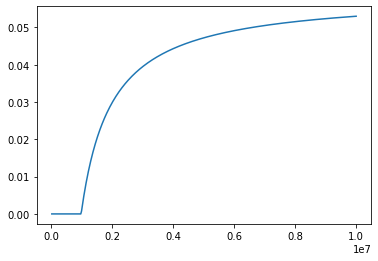

In [6]:
plt.plot(numberOfElements, relativeErrorArray)


In [7]:
# Zad 1.4

def recursiveSummator(arr):
    
    if len(arr) == 1:
        return arr[0]
    
    i = 0
    currentSums = []
    
    if (len(arr) % 2) == 0:
        while(i < len(arr)):
            currentSums.append(float32(arr[i]) + float32(arr[i + 1]))
            i += 2
    else:
        while i < (len(arr) - 1):
            currentSums.append(np.float32(arr[i]) + np.float32(arr[i + 1]))
            i += 2
        currentSums.append(float32(arr[i]))
        
    return recursiveSummator(currentSums)
              

print(recursiveSummator(array))
print(primitiveSummator(array))
print(exactSum)

5312500.0
5030840.5
5312500.0


In [8]:
# Zad 1.5

absoluteError = abs(recursiveSummator(array) - exactSum)
relativeError = absoluteError / exactSum

print(absoluteError)
print(relativeError)

# Błąd zmalał (do zera) ponieważ największą niedokładność uzyskujemy podczas sumowania liczb bardzo dużych z bardzo małymi.
# Algorytm rekurencyjny dodaje zawsze liczby o takich samych wartościach.

0.0
0.0


In [10]:
# Zad 1.6

start = time.process_time()
primitiveSummator(array)
end = time.process_time()

print("Czas dzialania algorytmu iteracyjnego wynosi: ", end - start)

start = time.process_time()
recursiveSummator(array)
end = time.process_time()

print("Czas dzialania algorytmu rekurencyjnego wynosi: ", end - start)

# algorytm iteracyjny jest szybszy

Czas dzialania algorytmu iteracyjnego wynosi:  1.125
Czas dzialania algorytmu rekurencyjnego wynosi:  10.78125


In [11]:
# Zad 1.7

a1 = []
for i in range(N // 2):
    a1.append(0.13 + i / 1000)
for i in range(N // 2):
    a1.append(100.17 + i / 1000)

print(np.sum(a1))
print(recursiveSummator(a1))

25501495000.000004
25501493000.0


In [12]:
#####

In [17]:
# Zad 2.1

def kahanAlgorithm(arr):
    sum = 0.0
    err = 0.0;
    for i in range(len(arr)): # (int i = 0; i < tab.length; ++i) 
        y = arr[i] - err
        temp = sum + y
        err = (temp - sum) - y
        sum = temp
    
    return sum

var = kahanAlgorithm(array)
print(var)

absoluteError = abs(var - exactSum)
relativeError = absoluteError / exactSum

print(absoluteError)
print(relativeError)

5312500.0
0.0
0.0


In [18]:
# Zad 2.2

# Zmienna sum przechowuje wartość dużo większą w porównaniu do zmiennej y, co powoduje utratę bitów mniej znaczących y.
# Wyrażenie (temp - sum) odzyskuje wyższe bity y, odjęcie y odzyskuje - (niższe bity y)
# Zmienna err kumuluje błędy
# na podst. https://en.wikipedia.org/wiki/Kahan_summation_algorithm

In [21]:
# Zad 2.3

start = time.process_time()
kahanAlgorithm(array)
end = time.process_time()

print("Czas dzialania algorytmu kahana wynosi: ", end - start)

start = time.process_time()
recursiveSummator(array)
end = time.process_time()

print("Czas dzialania alorytmu rekurencyjnego wynosi: ", end - start)

# algorytm rekurencyjny jest szybszy


Czas dzialania algorytmu kahana wynosi:  24.546875
Czas dzialania alorytmu rekurencyjnego wynosi:  10.828125


In [22]:
# Zad 3.1

def dzetaRiemanna(n, s):
    acc = float64(0)
    for i in range(1, n + 1):
        acc += float64(1 / (i**s))
        
    return acc

def dzetaRiemannaBackwards(n, s):
    acc = np.float64(0)
    for i in range(n, 0, -1):
        acc += np.float64(1 / (i**s))
        
    return acc

def etaDirichleta(n, s):
    acc = np.float64(0)
    for i in range(1, n + 1):
        acc += float64( (-1)**(i - 1) * ( 1 / (i**s) ) )  
        
    return acc

def etaDirichletaBackwards(n, s):
    acc = np.float64(0)
    for i in range(n, 0, -1):
        acc += float64( (-1)**(i - 1) * ( 1 / (i**s) ) )
        
    return acc

sArr = [2, 3.6667, 5, 7.2, 10]
nArr = [50, 100, 200, 500, 1000]

# kod do generowania wyników
for n in nArr:
    for s in sArr:
        print("\n", n, s, ":" , etaDirichleta(n, s))



 50 2 : 0.8222710318260295

 50 3.6667 : 0.9346930600307106

 50 5 : 0.9721197689267979

 50 7.2 : 0.9935270006613486

 50 10 : 0.9990395075982718

 100 2 : 0.8224175333741286

 100 3.6667 : 0.9346933211400662

 100 5 : 0.9721197703981592

 100 7.2 : 0.9935270006616185

 100 10 : 0.9990395075982718

 200 2 : 0.822454595922551

 200 3.6667 : 0.9346933421086845

 200 5 : 0.972119770445367

 200 7.2 : 0.9935270006616201

 200 10 : 0.9990395075982718

 500 2 : 0.8224650374240963

 500 3.6667 : 0.9346933438558745

 500 5 : 0.9721197704468947

 500 7.2 : 0.9935270006616201

 500 10 : 0.9990395075982718

 1000 2 : 0.8224665339241114

 1000 3.6667 : 0.9346933439141353

 1000 5 : 0.9721197704469091

 1000 7.2 : 0.9935270006616201

 1000 10 : 0.9990395075982718


Zad 3.1 wyniki ( n s : result )

1) Dla pojedynczej precyzji 
     
     a) dzeta Riemanna

         50 2 : 1.6251329

         50 3.6667 : 1.1093994

         50 5 : 1.0369275

         50 7.2 : 1.0072277

         50 10 : 1.0009946

         100 2 : 1.634984

         100 3.6667 : 1.1094086

         100 5 : 1.0369275

         100 7.2 : 1.0072277

         100 10 : 1.0009946

         200 2 : 1.6399467

         200 3.6667 : 1.1094086

         200 5 : 1.0369275

         200 7.2 : 1.0072277

         200 10 : 1.0009946

         500 2 : 1.642936

         500 3.6667 : 1.1094086

         500 5 : 1.0369275

         500 7.2 : 1.0072277

         500 10 : 1.0009946

         1000 2 : 1.6439348

         1000 3.6667 : 1.1094086

         1000 5 : 1.0369275

         1000 7.2 : 1.0072277

         1000 10 : 1.0009946
         
     b) dzeta Riemanna wstecz
    
         50 2 : 1.6251327

         50 3.6667 : 1.1093998

         50 5 : 1.0369277

         50 7.2 : 1.0072277

         50 10 : 1.0009946

         100 2 : 1.6349839

         100 3.6667 : 1.1094089

         100 5 : 1.0369277

         100 7.2 : 1.0072277

         100 10 : 1.0009946

         200 2 : 1.6399465

         200 3.6667 : 1.1094103

         200 5 : 1.0369277

         200 7.2 : 1.0072277

         200 10 : 1.0009946

         500 2 : 1.642936

         500 3.6667 : 1.1094105

         500 5 : 1.0369277

         500 7.2 : 1.0072277

         500 10 : 1.0009946

         1000 2 : 1.6439345

         1000 3.6667 : 1.1094105

         1000 5 : 1.0369277

         1000 7.2 : 1.0072277

         1000 10 : 1.0009946
         
     c) eta Dirichleta
     
         50 2 : 0.822271

         50 3.6667 : 0.9346931

         50 5 : 0.9721198

         50 7.2 : 0.99352705

         50 10 : 0.99903953

         100 2 : 0.8224175

         100 3.6667 : 0.9346933

         100 5 : 0.9721198

         100 7.2 : 0.99352705

         100 10 : 0.99903953

         200 2 : 0.8224547

         200 3.6667 : 0.9346933

         200 5 : 0.9721198

         200 7.2 : 0.99352705

         200 10 : 0.99903953

         500 2 : 0.82246536

         500 3.6667 : 0.9346933

         500 5 : 0.9721198

         500 7.2 : 0.99352705

         500 10 : 0.99903953

         1000 2 : 0.82246685

         1000 3.6667 : 0.9346933

         1000 5 : 0.9721198

         1000 7.2 : 0.99352705

         1000 10 : 0.99903953
         
     d) eta Dirichleta wstecz:
     
         50 2 : 0.82227105

         50 3.6667 : 0.93469304

         50 5 : 0.97211975

         50 7.2 : 0.993527

         50 10 : 0.99903953

         100 2 : 0.8224175

         100 3.6667 : 0.93469334

         100 5 : 0.97211975

         100 7.2 : 0.993527

         100 10 : 0.99903953

         200 2 : 0.8224546

         200 3.6667 : 0.93469334

         200 5 : 0.97211975

         200 7.2 : 0.993527

         200 10 : 0.99903953

         500 2 : 0.82246506

         500 3.6667 : 0.93469334

         500 5 : 0.97211975

         500 7.2 : 0.993527

         500 10 : 0.99903953

         1000 2 : 0.82246655

         1000 3.6667 : 0.93469334

         1000 5 : 0.97211975

         1000 7.2 : 0.993527

         1000 10 : 0.99903953
    

2) Podwójna precyzja

    a) dzeta Riemanna
    
         50 2 : 1.625132733621529

         50 3.6667 : 1.1093997551541945

         50 5 : 1.036927716716712

         50 7.2 : 1.0072276664762816

         50 10 : 1.0009945751278182

         100 2 : 1.6349839001848923

         100 3.6667 : 1.1094087973421474

         100 5 : 1.0369277526929555

         100 7.2 : 1.007227666480654

         100 10 : 1.0009945751278182

         200 2 : 1.6399465460149971

         200 3.6667 : 1.1094102423332313

         200 5 : 1.0369277549886775

         200 7.2 : 1.0072276664807145

         200 10 : 1.0009945751278182

         500 2 : 1.642936065514894

         500 3.6667 : 1.1094104908440712

         500 5 : 1.0369277551393863

         500 7.2 : 1.0072276664807145

         500 10 : 1.0009945751278182

         1000 2 : 1.6439345666815615

         1000 3.6667 : 1.1094105108423578

         1000 5 : 1.0369277551431222

         1000 7.2 : 1.0072276664807145

         1000 10 : 1.0009945751278182
         
     b) dzeta Riemanna wstecz
     
         50 2 : 1.6251327336215293

         50 3.6667 : 1.1093997551541943

         50 5 : 1.0369277167167108

         50 7.2 : 1.0072276664762823

         50 10 : 1.000994575127818

         100 2 : 1.634983900184893

         100 3.6667 : 1.1094087973421476

         100 5 : 1.0369277526929532

         100 7.2 : 1.007227666480655

         100 10 : 1.000994575127818

         200 2 : 1.6399465460149973

         200 3.6667 : 1.109410242333231

         200 5 : 1.036927754988676

         200 7.2 : 1.0072276664807163

         200 10 : 1.000994575127818

         500 2 : 1.6429360655148941

         500 3.6667 : 1.1094104908440725

         500 5 : 1.0369277551393858

         500 7.2 : 1.0072276664807172

         500 10 : 1.000994575127818

         1000 2 : 1.6439345666815597

         1000 3.6667 : 1.1094105108423593

         1000 5 : 1.0369277551431204

         1000 7.2 : 1.0072276664807172

         1000 10 : 1.000994575127818
        
    c) eta Dirichleta
    
        50 2 : 0.8222710318260295

        50 3.6667 : 0.9346930600307106

        50 5 : 0.9721197689267979

        50 7.2 : 0.9935270006613486

        50 10 : 0.9990395075982718

        100 2 : 0.8224175333741286

        100 3.6667 : 0.9346933211400662

        100 5 : 0.9721197703981592

        100 7.2 : 0.9935270006616185

        100 10 : 0.9990395075982718

        200 2 : 0.822454595922551

        200 3.6667 : 0.9346933421086845

        200 5 : 0.972119770445367

        200 7.2 : 0.9935270006616201

        200 10 : 0.9990395075982718

        500 2 : 0.8224650374240963

        500 3.6667 : 0.9346933438558745

        500 5 : 0.9721197704468947

        500 7.2 : 0.9935270006616201

        500 10 : 0.9990395075982718

        1000 2 : 0.8224665339241114

        1000 3.6667 : 0.9346933439141353

        1000 5 : 0.9721197704469091

        1000 7.2 : 0.9935270006616201

        1000 10 : 0.9990395075982718
        
    d) etaDirichleta wstecz
    
        50 2 : 0.8222710318260295

        50 3.6667 : 0.9346930600307106

        50 5 : 0.9721197689267979

        50 7.2 : 0.9935270006613486

        50 10 : 0.9990395075982718

        100 2 : 0.8224175333741286

        100 3.6667 : 0.9346933211400662

        100 5 : 0.9721197703981592

        100 7.2 : 0.9935270006616185

        100 10 : 0.9990395075982718

        200 2 : 0.822454595922551

        200 3.6667 : 0.9346933421086845

        200 5 : 0.972119770445367

        200 7.2 : 0.9935270006616201

        200 10 : 0.9990395075982718

        500 2 : 0.8224650374240963

        500 3.6667 : 0.9346933438558745

        500 5 : 0.9721197704468947

        500 7.2 : 0.9935270006616201

        500 10 : 0.9990395075982718

        1000 2 : 0.8224665339241114

        1000 3.6667 : 0.9346933439141353

        1000 5 : 0.9721197704469091

        1000 7.2 : 0.9935270006616201

        1000 10 : 0.9990395075982718

0.935824
0.62666494
0.80550575
0.2794925
0.07558643
0.98073214
0.43059567
0.12270558
0.031680018
0.99201626
0.4553241
0.8690108
0.68096215
0.7824172
0.73322886
0.24175054
0.064612396
0.9835772
0.43592426
0.12447512
0.032152567
0.008103814
0.9979699
0.5225281
0.8454967
0.6965345
0.2245615
0.05970507
0.984844
0.5615548
0.83107597
0.70550185


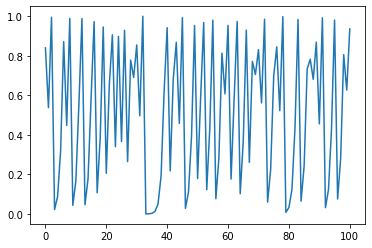

In [24]:
# Zad 4

def recursiveLogisticFunction(r, x0, n):
    if n == 0:
        return r * x0 * (1 - x0)
    return r * recursiveLogisticFunction(r, x0, n - 1) * (1 - recursiveLogisticFunction(r, x0, n - 1) )

valArr = []
argArr = []

def iterativeLogisticFunction(r, x0, n):
    var1 = float32( r * x0 * (1 - x0) )
    valArr.append(var1)
    argArr.append(0)
    for i in range(n):
        argArr.append(i + 1)
        var2 = float32( r * var1 * (1 - var1) )
        var1 = var2
        valArr.append(var1)

# kod służący do odczytywania granic:

iterativeLogisticFunction(4, 0.3, 100)

lastElements = 32 + 1

for i in range(1, lastElements):
    print(valArr[len(valArr) - i])

plt.plot(argArr, valArr)

In [ ]:
a)

Zbieżność procesu iteracyjnego w zależności od x0 i r.
Granice przybliżone, odczytane z wykresu.

# r	     x0	 n	   l.granic	wartosci							
# 2	    0.5	100	   1	    0.5238095							
# 2.2	0.5	100	   1	    0.5454545							
# 2.4	0.2	100	   1	    0.5833333
# 2.4	0.4	100	   1	    0.5833333
# 2.4	0.6	100	   1	    0.5833333
# 2.4	0.8	100	   1	    0.5833333
# 2.6	0.5	100	   1	    0.6153846							
# 2.8	0.5	100	   1	    0.6428571							
# 3	    0.5	100	   2	    0.6681506 0.6651761						
# 3.2	0.5	200	   2	    0.7994555 0.5130444						
# 3.4	0.5	2000   2	    0.8421544 0.45196328						
# 3.5	0.5	100	   4        0.87499726	0.5008842 0.8269407	0.38281968				
# 3.6	0.5	100	   8	    0.5710724 0.8022727 0.33523813 0.89607865 0.5330039 0.8192857 0.35026476 0.8907739

W miare wzrostu 'n' widać, że zbieżność nie zależy od parametru x0.

In [78]:
b)

dla 3.75 <= r <= 3.8 nie można zaobserwować zbieżności do żadnych wartości (ostatnie wartości w tabeli valArr)

c)

dla r = 4, x0 = 0.3 potrzebne jest 3008 iteracji do osiągnięcia zera

    


